<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px"> 

# Project 1: Project 2 - Singapore Housing Data and Kaggle Challenge

--- 
# Part 1 Data processing and EDA
---

# Contents:
- [Problem Statement](#Problem-Statement)
- [Data Import](#Data-Import)
- [Missing Values & cleaning]
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-Data)
- [EDA evaluations](#Conclusions-and-Recommendations)

## Problem Statement

House pricing affects the decision making process of buyers in their assessment of the unit. 
The goal is to have the model accurately predict the sales price of the houses in the(unknown)  test set, which will be evaluated based on common evaluation metrics such as R2 and RMSE.
This will give those who are impacted by housing prices, e.g. owners, buyers and agents additional information to consider in their decision making process.



## All libraries used

In [53]:
# Imports:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

## Data Import

In [54]:
#import and clean date of train data.
train = pd.read_csv('../../data/train.csv')
print(train.shape)
train.info()
train.head()

C:\Users\benja\AppData\Local\Temp\ipykernel_5256\2845781486.py:2: DtypeWarning: Columns (41) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv('../../data/train.csv')


(150634, 77)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150634 entries, 0 to 150633
Data columns (total 77 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   id                         150634 non-null  int64  
 1   Tranc_YearMonth            150634 non-null  object 
 2   town                       150634 non-null  object 
 3   flat_type                  150634 non-null  object 
 4   block                      150634 non-null  object 
 5   street_name                150634 non-null  object 
 6   storey_range               150634 non-null  object 
 7   floor_area_sqm             150634 non-null  float64
 8   flat_model                 150634 non-null  object 
 9   lease_commence_date        150634 non-null  int64  
 10  resale_price               150634 non-null  float64
 11  Tranc_Year                 150634 non-null  int64  
 12  Tranc_Month                150634 non-null  int64  
 13  mid_storey      

id Tranc_YearMonth             town  flat_type block       street_name  \
0   88471         2016-05  KALLANG/WHAMPOA     4 ROOM    3B  UPP BOON KENG RD   
1  122598         2012-07           BISHAN     5 ROOM   153      BISHAN ST 13   
2  170897         2013-07      BUKIT BATOK  EXECUTIVE  289B    BT BATOK ST 25   
3   86070         2012-04           BISHAN     4 ROOM   232      BISHAN ST 22   
4  153632         2017-12           YISHUN     4 ROOM   876      YISHUN ST 81   

  storey_range  floor_area_sqm  flat_model  lease_commence_date  ...  vacancy  \
0     10 TO 12            90.0     Model A                 2006  ...       78   
1     07 TO 09           130.0    Improved                 1987  ...       45   
2     13 TO 15           144.0   Apartment                 1997  ...       39   
3     01 TO 05           103.0     Model A                 1992  ...       20   
4     01 TO 03            83.0  Simplified                 1987  ...       74   

   pri_sch_affiliation  pri_sch_latitude  pri_sch_longitude  \
0                    1          1.317659         103.882504   
1                    1          1.349783         103.854529   
2                    0          1.345245         103.756265   
3                    1          1.354789         103.844934   
4                    0          1.416280         103.838798   

   sec_sch_nearest_dist                             sec_sch_name  \
0           1138.633422                 Geylang Methodist School   
1            447.894399  Kuo Chuan Presbyterian Secondary School   
2            180.074558             Yusof Ishak Secondary School   
3            389.515528                     Catholic High School   
4            312.025435             Orchid Park Secondary School   

   cutoff_point affiliation sec_sch_latitude  sec_sch_longitude  
0           224           0         1.317659         103.882504  
1           232           0         1.350110         103.854892  
2           188           0         1.342334         103.760013  
3           253           1         1.354789         103.844934  
4           208           0         1.414888         103.838335  

[5 rows x 77 columns]

## Missing Values & cleaning
* Inspect the column with warning message,
* check duplicates of id
* Inspect object dtypes
* Inspect Null values.

When importing in train.csv, a warning was raised indicating that there is an issue with the data type in column 41 which is the postal code column. Logically, it should already be in numeric form so an inspection is needed to clean that portion up.

In [55]:
#check on column 40 
train[train.columns[41]]

0         382003
1         570153
2         651289
3         570232
4         760876
           ...  
150629    730849
150630    644648
150631    410639
150632    270032
150633    762666
Name: postal, Length: 150634, dtype: object

In [58]:
#check null
train['postal'].isna().sum()

0

In [66]:
#check on object culprit
mask = pd.to_numeric(train['postal'], errors='coerce').isna()
train['postal'].loc[mask].value_counts()

Series([], Name: postal, dtype: int64)

String 'NIL' is the reason for the object dtype. Conversion to nan and dtype of column to string as postal codes has categorical value rather than numerical value.

In [67]:
#verify and replace to nan
train[train['postal'] == 'NIL']
train['postal'].replace(['NIL'],[np.nan], inplace = True)

In [68]:
#convert to numeric and check
train['postal'] = pd.to_numeric(train['postal'])

In [71]:
# check duplicates on id
train['id'].duplicated().sum()

0

no duplicates in id, so it is taken that the lines are unique transactions.

In [69]:
train['residential'].value_counts()

Y    150634
Name: residential, dtype: int64

Further inspection of info show that many 'residential', 'commercial', 'market_hawker', 'multistorey_carpark and 'precinct_pavilion' features had object type with strings Y & N as string type Boolean operators. Conversion to numeric form would be more useful for modeling later on.

In [10]:
# function to convert string based boolean operators into int
def bool_converter(feature):
    for n in feature:
        train[n].replace({'Y': 1, 'N' : 0}, inplace = True)

In [11]:
# list of columns with boolean operators categories to convert
object_features = ['residential', 'commercial', 'market_hawker', 'multistorey_carpark', 'precinct_pavilion']
bool_converter(object_features)

In [12]:
#check
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150634 entries, 0 to 150633
Data columns (total 77 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   id                         150634 non-null  int64  
 1   Tranc_YearMonth            150634 non-null  object 
 2   town                       150634 non-null  object 
 3   flat_type                  150634 non-null  object 
 4   block                      150634 non-null  object 
 5   street_name                150634 non-null  object 
 6   storey_range               150634 non-null  object 
 7   floor_area_sqm             150634 non-null  float64
 8   flat_model                 150634 non-null  object 
 9   lease_commence_date        150634 non-null  int64  
 10  resale_price               150634 non-null  float64
 11  Tranc_Year                 150634 non-null  int64  
 12  Tranc_Month                150634 non-null  int64  
 13  mid_storey                 15

With the dtypes satisfactory, now the check is on column features with high null counts, notably those related to Hawker and Mall.
It seems coincidental that the null counts seems to be decreasing in a tiered manner with increasing distance, perhaps there is an underlying pattern.

In [13]:
#Checking hawker distance to see if its fits with the ranged categories
hawker_dist = train['Hawker_Nearest_Distance']
print(train['Hawker_Within_500m'].isnull().sum() == hawker_dist.loc[hawker_dist > 500 ].count())
print(train['Hawker_Within_1km'].isnull().sum() == hawker_dist.loc[hawker_dist > 1000 ].count())
print(train['Hawker_Within_2km'].isnull().sum() == hawker_dist.loc[hawker_dist > 2000 ].count())

True
True
True


From the above, the exact match of the hawker distance features indicate it is simply 0 counts that have been missed out. Therefore it is possible to impute the missing data with 0.

In [14]:
#imputing 0.
train['Hawker_Within_500m'].replace([np.nan], 0, inplace = True)
train['Hawker_Within_1km'].replace([np.nan], 0, inplace = True)
train['Hawker_Within_2km'].replace([np.nan], 0, inplace = True)

In [15]:
#verify there is no nulls
train['Hawker_Within_500m'].isna().sum()+train['Hawker_Within_1km'].isna().sum() + train['Hawker_Within_2km'].isna().sum()

0

For the mall features, it is not as straightforward as it seems that there are also null values in the main mall feature 'Mall_Nearest_Distance'. A quick google of the address would help discern any reasons.
The percentage of missing data also has to be determined first before we can consider imputing data.

In [74]:
#cehcking on house with no mall distance
train.loc[train['Mall_Nearest_Distance'] == 0,['address']]

address
443     680, WOODLANDS AVE 6
3533     137, TECK WHYE LANE
10071       221, BOON LAY PL
11695    137, TECK WHYE LANE
32075    137, TECK WHYE LANE
35684       221, BOON LAY PL
55767   680, WOODLANDS AVE 6
57455   680, WOODLANDS AVE 6
61436   680, WOODLANDS AVE 6
66754   680, WOODLANDS AVE 6
72568   680, WOODLANDS AVE 6
77087   680, WOODLANDS AVE 6
77130   680, WOODLANDS AVE 6
80935   680, WOODLANDS AVE 6
84301   680, WOODLANDS AVE 6
89841       221, BOON LAY PL
93802       221, BOON LAY PL
95575   680, WOODLANDS AVE 6
96788   680, WOODLANDS AVE 6
101840      221, BOON LAY PL
105824  680, WOODLANDS AVE 6
109322  680, WOODLANDS AVE 6
111811  680, WOODLANDS AVE 6
114835      221, BOON LAY PL
138031      221, BOON LAY PL
139193  680, WOODLANDS AVE 6
140189  680, WOODLANDS AVE 6
144825   137, TECK WHYE LANE
146758  680, WOODLANDS AVE 6
149477   137, TECK WHYE LANE

In [16]:
#check percentage
mall_dist = train['Mall_Nearest_Distance']
mall_dist_null = mall_dist.isna().sum()
mall_dist_null/train.shape[0]*100

0.550340560564016

In [17]:
#Checking mall distance to see if its fits with the ranged categories
print(train['Mall_Within_500m'].isnull().sum() == (mall_dist.loc[mall_dist > 500].count() + mall_dist_null))
print(train['Mall_Within_1km'].isnull().sum() == (mall_dist.loc[mall_dist > 1000 ].count() + mall_dist_null))
print(train['Mall_Within_2km'].isnull().sum() == (mall_dist.loc[mall_dist > 2000 ].count() + mall_dist_null))

True
True
True


For the Nearest mall distance, there is 0.55% entires with null data in that row. Checking the actual locations, shows that is near to areas with "shopping centres or some amenitites but not exactly a mall per se. While it is certianly possible to impute in values as either 0, there is some ambiguity still. Since it is a small percentage, it would be best to drop these rows especially since it is adding on to the null counts of the other mall features. 

Similar to the hawker distance, the missing values of the mall distance features are simply 0 counts. Therefore it is possible to impute the missing data with 0.

In [75]:
train.dropna(subset=['Mall_Nearest_Distance'], inplace = True)

In [76]:
train['Mall_Within_500m'].replace([np.nan], 0, inplace = True)
train['Mall_Within_1km'].replace([np.nan], 0, inplace = True)
train['Mall_Within_2km'].replace([np.nan], 0, inplace = True)

In [77]:
print(train.info())
train.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149805 entries, 0 to 150633
Data columns (total 77 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   id                         149805 non-null  int64  
 1   Tranc_YearMonth            149805 non-null  object 
 2   town                       149805 non-null  object 
 3   flat_type                  149805 non-null  object 
 4   block                      149805 non-null  object 
 5   street_name                149805 non-null  object 
 6   storey_range               149805 non-null  object 
 7   floor_area_sqm             149805 non-null  float64
 8   flat_model                 149805 non-null  object 
 9   lease_commence_date        149805 non-null  int64  
 10  resale_price               149805 non-null  float64
 11  Tranc_Year                 149805 non-null  int64  
 12  Tranc_Month                149805 non-null  int64  
 13  mid_storey                 14

id Tranc_YearMonth             town  flat_type block       street_name  \
0   88471         2016-05  KALLANG/WHAMPOA     4 ROOM    3B  UPP BOON KENG RD   
1  122598         2012-07           BISHAN     5 ROOM   153      BISHAN ST 13   
2  170897         2013-07      BUKIT BATOK  EXECUTIVE  289B    BT BATOK ST 25   
3   86070         2012-04           BISHAN     4 ROOM   232      BISHAN ST 22   
4  153632         2017-12           YISHUN     4 ROOM   876      YISHUN ST 81   

  storey_range  floor_area_sqm  flat_model  lease_commence_date  ...  vacancy  \
0     10 TO 12            90.0     Model A                 2006  ...       78   
1     07 TO 09           130.0    Improved                 1987  ...       45   
2     13 TO 15           144.0   Apartment                 1997  ...       39   
3     01 TO 05           103.0     Model A                 1992  ...       20   
4     01 TO 03            83.0  Simplified                 1987  ...       74   

   pri_sch_affiliation  pri_sch_latitude  pri_sch_longitude  \
0                    1          1.317659         103.882504   
1                    1          1.349783         103.854529   
2                    0          1.345245         103.756265   
3                    1          1.354789         103.844934   
4                    0          1.416280         103.838798   

   sec_sch_nearest_dist                             sec_sch_name  \
0           1138.633422                 Geylang Methodist School   
1            447.894399  Kuo Chuan Presbyterian Secondary School   
2            180.074558             Yusof Ishak Secondary School   
3            389.515528                     Catholic High School   
4            312.025435             Orchid Park Secondary School   

   cutoff_point affiliation sec_sch_latitude  sec_sch_longitude  
0           224           0         1.317659         103.882504  
1           232           0         1.350110         103.854892  
2           188           0         1.342334         103.760013  
3           253           1         1.354789         103.844934  
4           208           0         1.414888         103.838335  

[5 rows x 77 columns]

After checking through the data, non null counts, postal column still has the 33 null entries.

In [78]:
postal_null = train['postal'].isna().sum()
postal_null/train.shape[0]*100

0.022028637228396916

Since it constitutes a very small portion (< 0.1%) of the data, it is better to drop the entries with missing postal information to standardize the dataframe.

In [79]:
train.dropna(subset=['postal'], inplace = True)

With this, all null values have been accounted for, either be adding in the 0 or by dropping the rows entirely.

Once clean, Data is first exported before EDA

In [23]:
#data export
if not os.path.exists('../../data/output'):
    os.makedirs('../../data/output')
train.to_csv('../../data/output/clean_train.csv', index = False)

## Exploratory Data Analysis

* Data distribution of target feature 'resale_price'
* Checking features to be dropped due to non usable information, collinearity, errant features.
* Reducing features for further analysis.
* Plotting retained features against target feature
* outlier analysis

In [136]:
#reload data
train = pd.read_csv('../../data/output/clean_train.csv')

Since the target of interest is the resale price, it would be good to take a look at the distribution to have a better understanding.

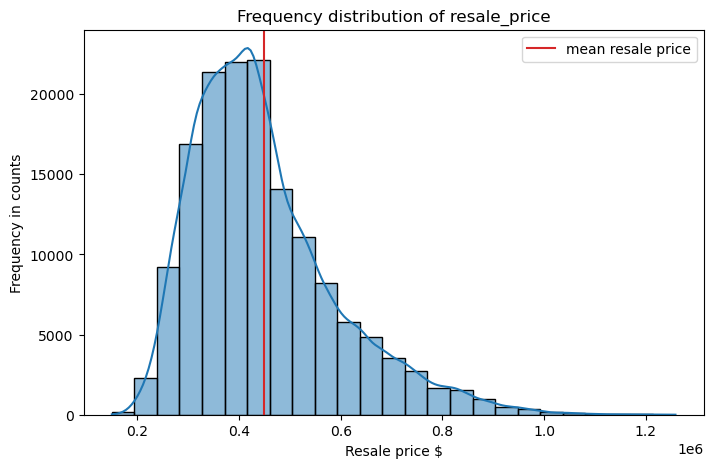

In [167]:
#resale_price histogram
plt.figure(figsize = (8, 5))

sns.histplot(data = [train['resale_price']], bins = 25, kde = True, color = ['tab:blue'])
plt.axvline(train['resale_price'].mean(), color = 'tab:red', alpha = 1.0, label='mean resale price')

plt.title('Frequency distribution of resale_price')            
plt.xlabel('Resale price $')                                   
plt.ylabel('Frequency in counts')                                        
plt.legend(fontsize='medium');

In [25]:
train['resale_price'].describe()

count    1.497720e+05
mean     4.486613e+05
std      1.432260e+05
min      1.500000e+05
25%      3.460000e+05
50%      4.200000e+05
75%      5.200000e+05
max      1.258000e+06
Name: resale_price, dtype: float64

From the statistics, the mean transaction prices is \\$448,661 while the median is lower at \$420,000. This is evident in the deviation from normal into the right tailed distribution that we see. One possible reason we see this distribution is perhaps due to the long period of the data we are witnessing the increasing prices of resale flats in recent years pushing up the average prices. This indicates that atleast one time related feature should be kept and perhaps an exploration of price over time can be made later on.

To move forward, we would need to look at the correlation of the variables features.

In [24]:
train_corr = train.corr(numeric_only = True)
mask = np.triu(np.ones_like(train_corr.corr()))

Text(0.5, 1.0, 'Heatmap of correlation between variables in the train dataset')

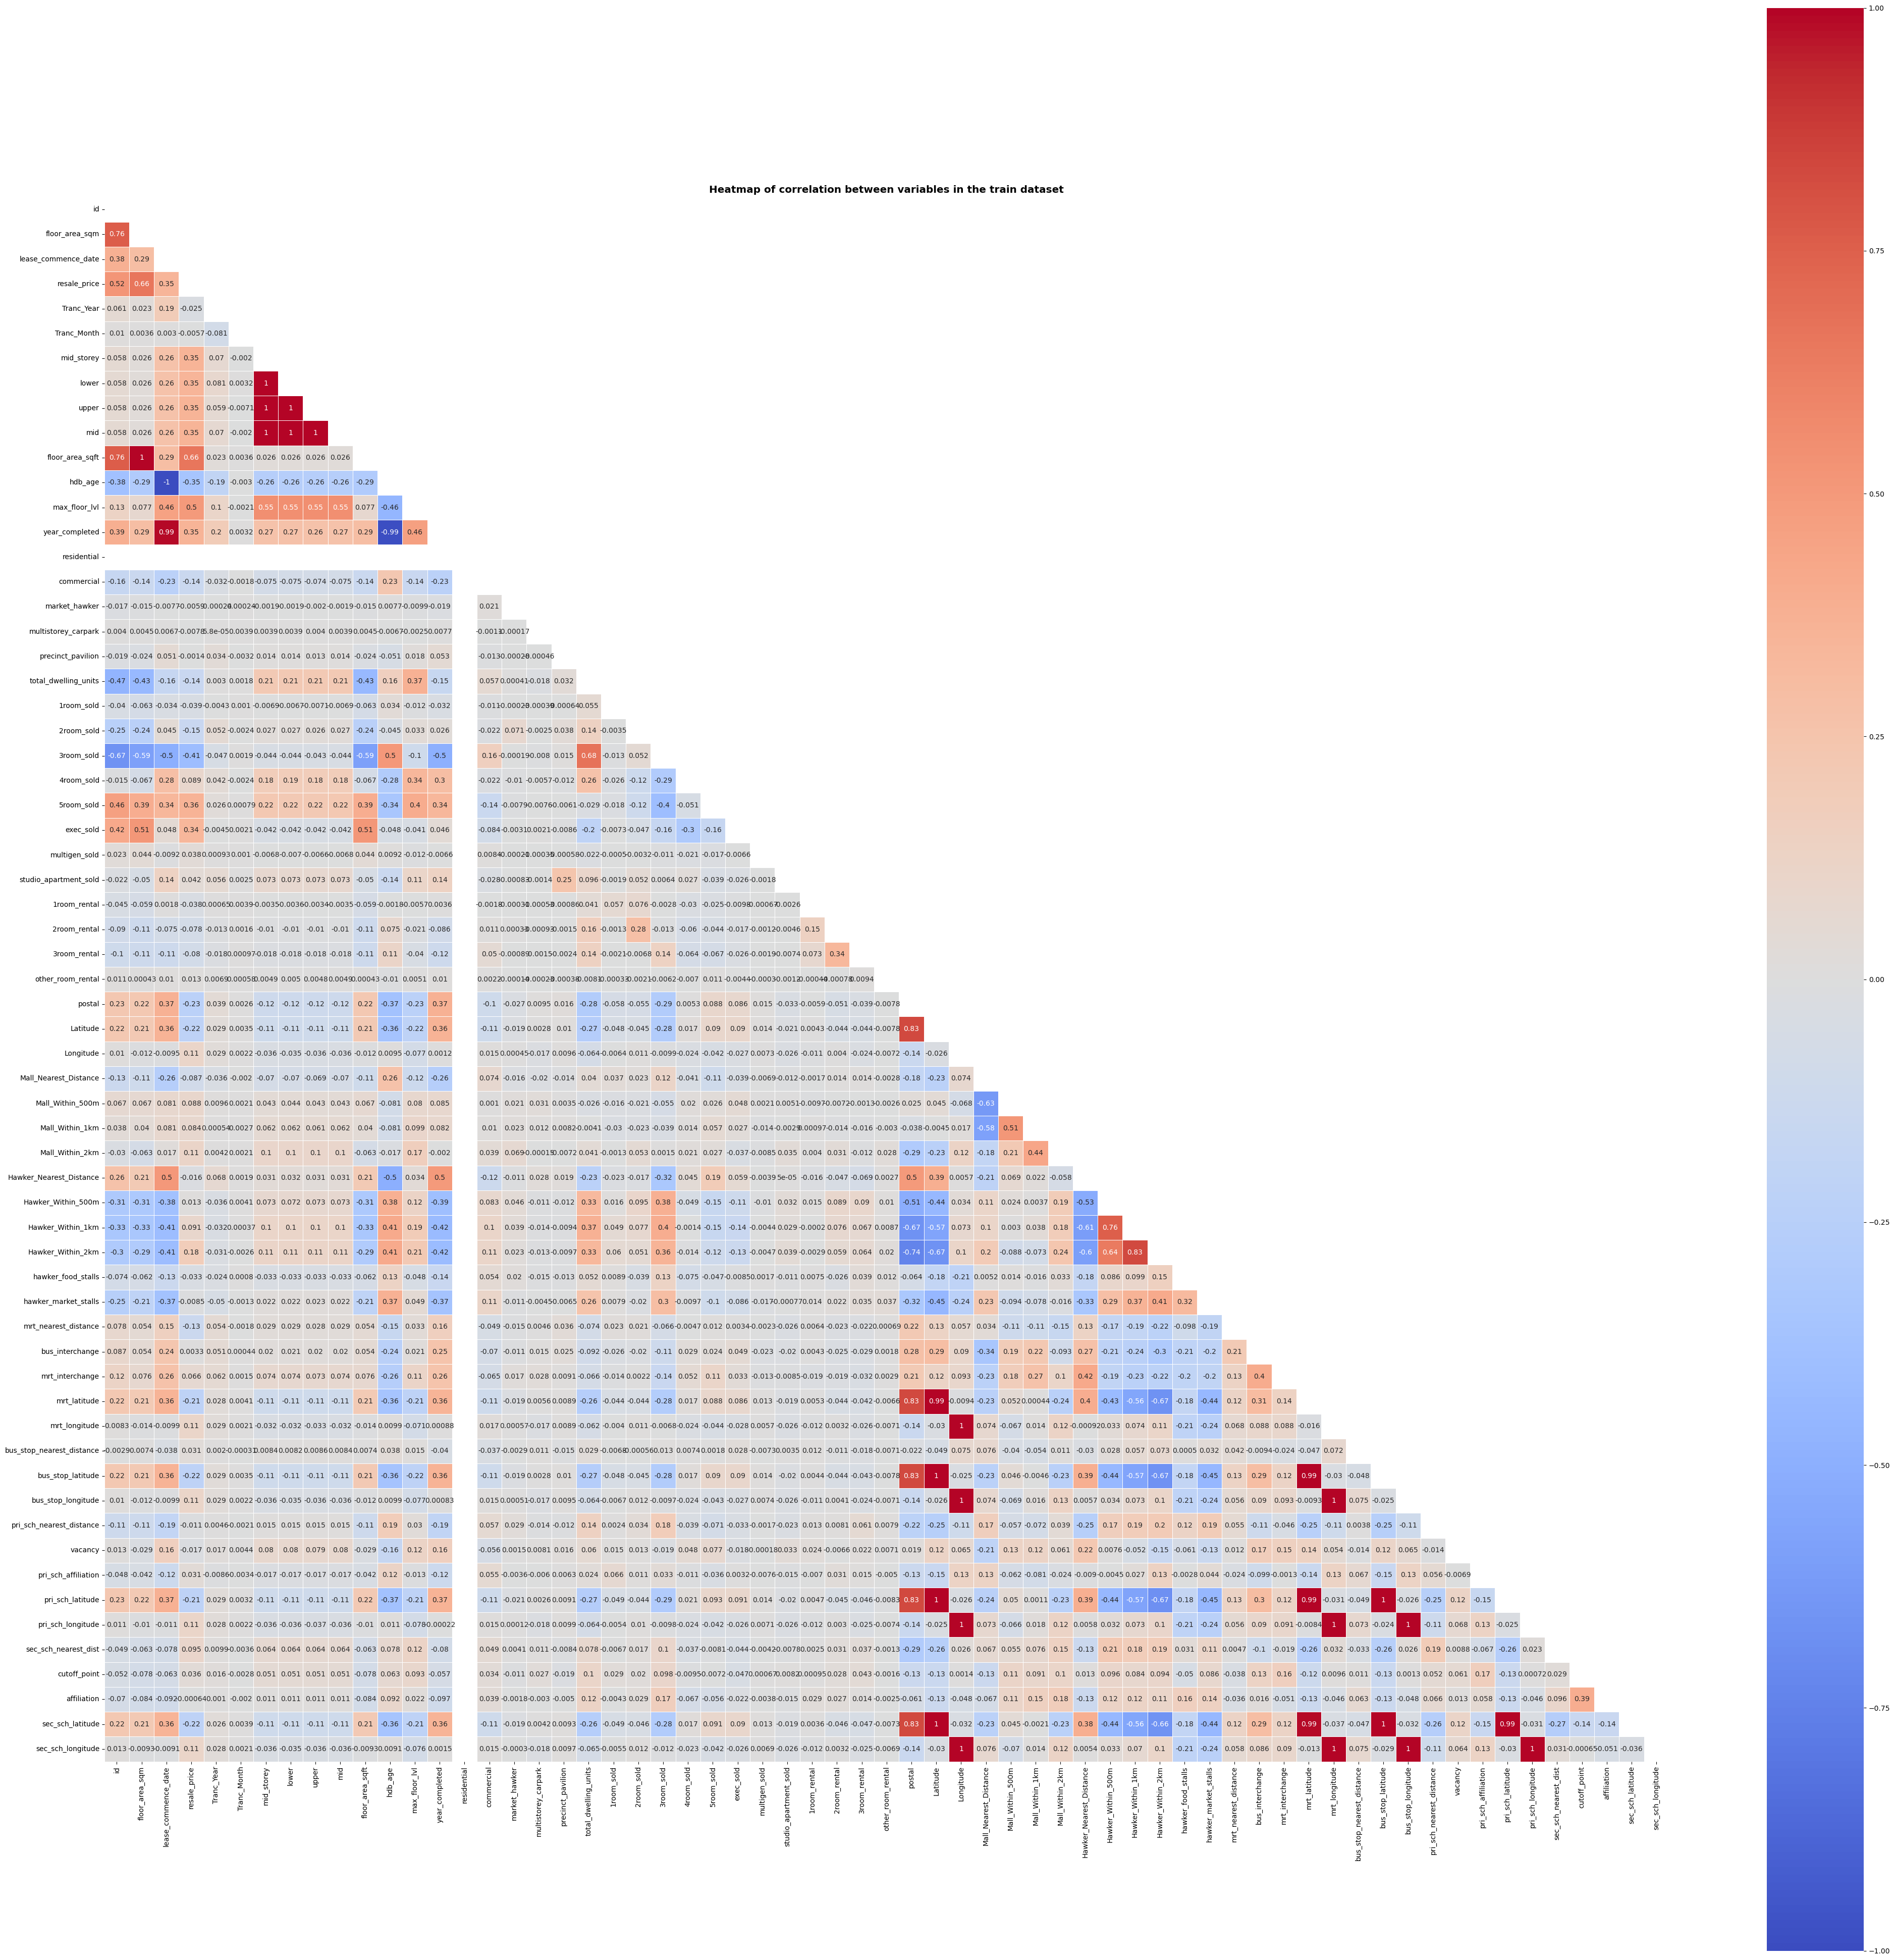

In [26]:
# plot heat map .corr()
plt.figure(figsize = (50, 50))
sns.heatmap(data = train_corr,
           vmin = -1,
           vmax = 1,
           square = True,
           annot = True,
           linewidths = 0.5,
           cmap= 'coolwarm', 
           mask = mask
          )

#set plot labelling
plt.title('Heatmap of correlation between variables in the train dataset', fontdict = {'fontsize': 'x-large', 'fontweight': 'bold'})

There is a noticeable blank streak for residential which likely indicates an issue with the numerical data possibly only having 1 value throughout.

In [26]:
train['residential'].value_counts()

1    149772
Name: residential, dtype: int64

From the value counts above, there is only 1 value throughout the entire feature which is a zero variance feature, explaining the absence of any correlation data in the heatmap. This feature will be dropped. <br>

As for the rest of the heatmap, clearly there is too much data features and much reductions have to be made. Some extra effort is needed to manually identify and whittle down the features based on their relation as described in the dataset and existing public domain knowledge especially since the heatmap does not cover non numerical features.

However, the heatmap does help us helps us to quickly identify numerical featuressuch as longitude and lattidue are highly collinearated as the values are in a different form and hence would not be useful for modelling. other such as floor level split into upper, mid and lower as well as floor area in sqm and sqft are eseentially the same features and the modelling process would be better serveed by dropping all but one of each kind of feature.

The following will be some examples of the thought processs involved in determining features to be dropped, together with existing knowledge about housing in Singapore. <br>

##### location features
some relation is suggested by the label 'planning_area' and 'town' so inspecting the unique values would be in order.

In [27]:
#inspecting unique values
print('No. of unique values in planning_area: ', train['planning_area'].unique().shape[0])
print('No. of unique values in town: ', train['town'].unique().shape[0])
train.loc[:,['planning_area','town']].value_counts()

No. of unique values in planning_area:  32
No. of unique values in town:  26


planning_area            town           
Jurong West              JURONG WEST        11445
Woodlands                WOODLANDS          11299
Sengkang                 SENGKANG           10867
Tampines                 TAMPINES           10463
Yishun                   YISHUN             10037
Bedok                    BEDOK               9023
Punggol                  PUNGGOL             7614
Hougang                  HOUGANG             7537
Ang Mo Kio               ANG MO KIO          6907
Choa Chu Kang            CHOA CHU KANG       6195
Bukit Merah              BUKIT MERAH         5834
Bukit Panjang            BUKIT PANJANG       5664
Bukit Batok              BUKIT BATOK         5623
Toa Payoh                TOA PAYOH           4804
Pasir Ris                PASIR RIS           4708
Queenstown               QUEENSTOWN          4044
Geylang                  GEYLANG             3951
Sembawang                SEMBAWANG           3723
Clementi                 CLEMENTI            3628
Jurong Ea

In [28]:
#inspecting discrepency values of 77 entries tagged as Bukit Batok & KALLANG/WHAMPOA
incongruent_data = train.loc[(train['planning_area'] == 'Bukit Batok') & (train['town'] == 'KALLANG/WHAMPOA')]
incongruent_data[['address']].head()

address
2032  10, JLN BATU
3633  10, JLN BATU
5925   4, JLN BATU
7236   6, JLN BATU
9879  10, JLN BATU

As seen from above, comparing 'planning_area' and town, while planning area has 32 unique categories and 'town' has 26, of which many overlap. Both are seemingly the same if not for casing and a few categories in which the town/area mentioned are geographically similar. In this case, more segmenting would give slightly more granularity that may help the model later on. 

However, there are 77 entries which are labelled Bukit Batok in 'planning_area' and KALLANG/WHAMPOA in 'town' which is geographically incongruent. After filtering out the address of the offending line, the resulting address of JLN BATU when searched on google maps returns an area close to the kallang area, indicating that there is some fault with these entries. These entries will have to be further cleaned out as the data is suspect. In any case, there are other datapoints with correctly labelled areas in both features for Bukit Batok and KALLANG/WHAMPOA.

##### flat type features
some relation is suggested by the label 'full_flat_type', 'flat_type' and 'flat_model' so inspecting the unique categories would be in order.

In [29]:
#inspecting unique values
print(train['full_flat_type'].unique().shape[0])
train['full_flat_type'].value_counts()

43


4 ROOM Model A                       34760
5 ROOM Improved                      25686
3 ROOM New Generation                15227
3 ROOM Improved                      10238
3 ROOM Model A                        8335
4 ROOM New Generation                 8139
4 ROOM Premium Apartment              7541
EXECUTIVE Apartment                   6079
5 ROOM Premium Apartment              5483
4 ROOM Simplified                     5309
EXECUTIVE Maisonette                  4362
3 ROOM Standard                       2522
4 ROOM Model A2                       2064
5 ROOM Model A                        1941
3 ROOM Simplified                     1929
4 ROOM Improved                       1847
5 ROOM Standard                       1686
EXECUTIVE Premium Apartment           1435
5 ROOM DBSS                            863
2 ROOM Model A                         730
4 ROOM DBSS                            598
2 ROOM Standard                        594
2 ROOM Improved                        521
3 ROOM Prem

In [30]:
#inspecting unique values
print(train['flat_type'].unique().shape[0])
train['flat_type'].value_counts()

7


4 ROOM              60637
3 ROOM              38905
5 ROOM              36219
EXECUTIVE           11986
2 ROOM               1887
1 ROOM                 82
MULTI-GENERATION       56
Name: flat_type, dtype: int64

In [31]:
#inspecting unique values
print(train['flat_model'].unique().shape[0])
train['flat_model'].value_counts()

20


Model A                   45766
Improved                  38374
New Generation            23366
Premium Apartment         14887
Simplified                 7238
Apartment                  6079
Standard                   4867
Maisonette                 4362
Model A2                   2064
DBSS                       1639
Model A-Maisonette          262
Adjoined flat               260
Type S1                     242
Type S2                     127
Terrace                      95
Multi Generation             56
Premium Apartment Loft       50
Improved-Maisonette          19
Premium Maisonette           15
2-room                        4
Name: flat_model, dtype: int64

For 'full_flat_type', utilising it as the split up features 'flat_type' and 'flat_model' makes more sense as it reduces the tailing at the end when the combined flat type and flat model are forced into separate categories, each with lower numbers so 'full_flat_type'

##### storey features
'lower', 'mid', 'upper' is stated to have been taken from 'storey_range'

In [156]:
train.loc[:,['storey_range','lower', 'mid', 'upper']].value_counts()

storey_range  lower  mid  upper
04 TO 06      4      5    6        34558
07 TO 09      7      8    9        30944
01 TO 03      1      2    3        27525
10 TO 12      10     11   12       27046
13 TO 15      13     14   15       12416
16 TO 18      16     17   18        5465
19 TO 21      19     20   21        2366
01 TO 05      1      3    5         2168
06 TO 10      6      8    10        1983
22 TO 24      22     23   24        1667
11 TO 15      11     13   15        1008
25 TO 27      25     26   27         891
28 TO 30      28     29   30         557
34 TO 36      34     35   36         242
31 TO 33      31     32   33         241
37 TO 39      37     38   39         218
16 TO 20      16     18   20         212
40 TO 42      40     41   42         101
21 TO 25      21     23   25          82
26 TO 30      26     28   30          29
46 TO 48      46     47   48          21
43 TO 45      43     44   45          15
49 TO 51      49     50   51          10
36 TO 40      36     38  

With the above examples comparing the value counts together, it is confirmed that 'lower', 'mid' and 'upper'features all borrow from the parent feature 'storey_range'. To prevent collinearity from these column features as well have the data in a numeric form, the mid values is retained and the rest dropped instead of the parent.

### Reducing features for further analysis
With the above analysis, we can remove errant data and reduce collinear features

In [80]:
#drop the incongruent data
train.drop(index = incongruent_data.index, inplace = True)

In [81]:
#check
train.shape[0]

149695

As the list very long, the chosen features are marked 1 and the rejected are marked 0 in a csv file located 
```
../../data/dataset_description_chosen.csv
```
While the features can be manually called out, Since the features have been marked 1 and 0, it would be easier to jsut ust it as a mask to drop unwanted columns.

In [82]:
#import data csv for use as filter mask 
choose_mask = pd.read_csv('../../data/dataset_description_chosen.csv')
choose_mask.head(5)

Codebook / Data Dictionary  \
0               resale_price   
1            Tranc_YearMonth   
2                       town   
3                  flat_type   
4                      block   

                                          Unnamed: 1  \
0   the property's sale price in Singapore dollar...   
1   year and month of the resale transaction, e.g...   
2   HDB township where the flat is located, e.g. ...   
3          type of the resale flat unit, e.g. 3 ROOM   
4          block number of the resale flat, e.g. 454   

   Decision( 1 = Accept, 0 = Reject)                                Remarks  
0                                  1                                 Target  
1                                  0  data found in Tranc_Year, Tranc_Month  
2                                  0               similar to planning_area  
3                                  1                                    NaN  
4                                  0   related to street_name, too granular

In [83]:
#set up csv as a drop list with the inclusion of id.
drop_list = list(choose_mask.loc[choose_mask['Decision( 1 = Accept, 0 = Reject)'] == 0, 'Codebook / Data Dictionary'])
drop_list.append('id')

In [84]:
train.drop(columns = drop_list, inplace = True)

### Reduced features analysis
With the features reduced, a more in depth analysis of the data can be done but first the data has to be organised into categorical and numerical categories.

In [85]:
train.nunique()

flat_type                       7
street_name                   547
floor_area_sqm                169
flat_model                     20
lease_commence_date            53
resale_price                 3288
Tranc_Year                     10
Tranc_Month                    12
mid                            22
max_floor_lvl                  39
commercial                      2
market_hawker                   2
multistorey_carpark             2
precinct_pavilion               2
total_dwelling_units          316
1room_sold                      2
2room_sold                     97
3room_sold                    255
4room_sold                    197
5room_sold                    133
exec_sold                     103
multigen_sold                   7
studio_apartment_sold          57
1room_rental                   10
2room_rental                   48
3room_rental                   14
other_room_rental               3
planning_area                  32
Mall_Nearest_Distance        8980
Mall_Within_50

In [86]:
cat_feat = ['flat_type', 'street_name', 'flat_model', 'commercial', 'market_hawker',   
            'multistorey_carpark', 'precinct_pavilion', 'planning_area', 'bus_interchange', 
            'mrt_interchange', 'pri_sch_name', 'pri_sch_affiliation', 'sec_sch_name'
           ]

In [87]:
num_feat = list(set(train.columns) - set(cat_feat))

#### time features
As mentioend previously, the resale_price distribution had a right tail which may possibly be linked to time.

In [209]:
#data prep
year_by_resale = train.groupby('Tranc_Year')['resale_price'].mean()
month_by_resale = train.groupby('Tranc_Month')['resale_price'].mean()

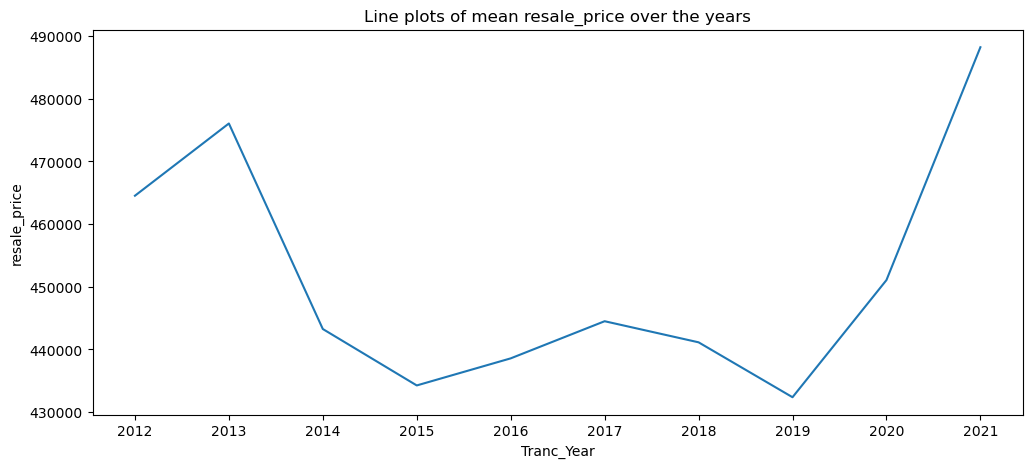

In [219]:
#plots
plt.figure(figsize = (12, 5))
plt.title('Line plots of mean resale_price over the years')
sns.lineplot(data = year_by_resale)
year_ticks = [year for year in range(2012, 2022)]
plt.xticks(year_ticks);

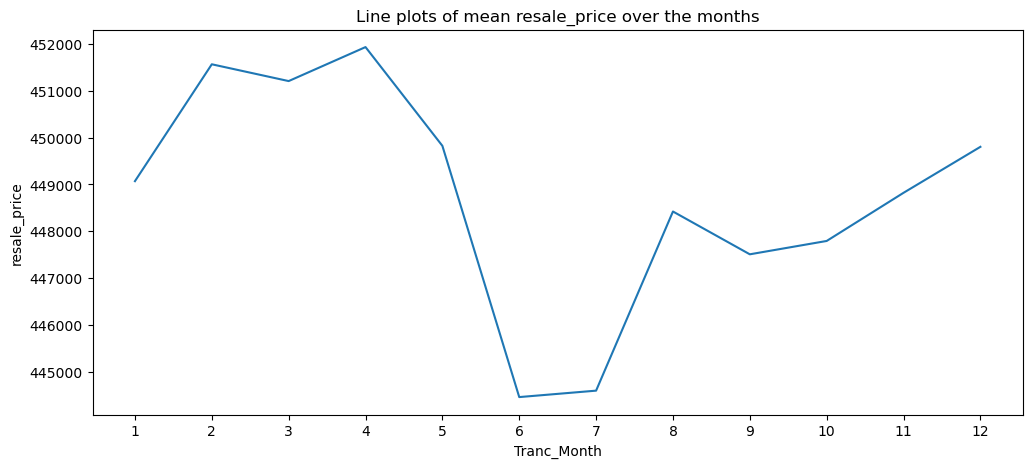

In [220]:
#plots
plt.figure(figsize = (12, 5))
plt.title('Line plots of mean resale_price over the months')
sns.lineplot(data = month_by_resale);
month_ticks = [month for month in range(1, 13)]
plt.xticks(month_ticks);

With these 2 plots, one over the years and one over month. Each tells a different story.

Resale price over the last decade has not been constant, generally lower from 2014 to 2019, afterwhich the prices have been going up. This aligns with news of house prices being high especially after 2020 when covid caused a surge in demand. The average price increased from 430000 to about 490000, rouhgly 60k which is quite a fair bit.

For month plots, since it is not tagged to year, it just shows a general slump in transactions in the months of June to July while the peak is from Febuary to April.


#### numerical features

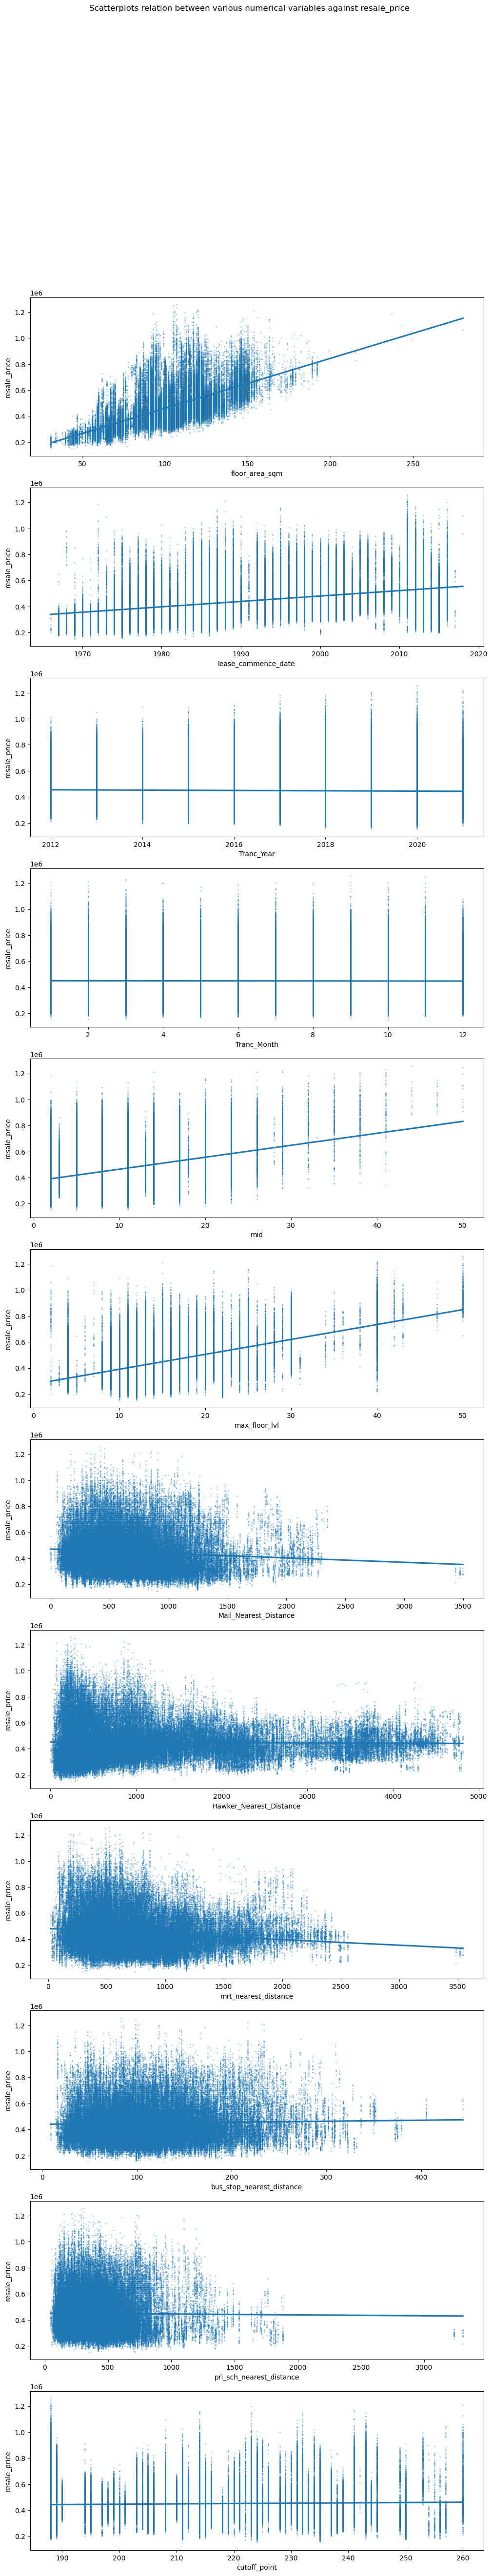

In [129]:
# Plot and interpret scatter plots to view relationships between features
fig, axes = plt.subplots(12, 1, sharex = False, sharey = False, figsize = (12, 60))
fig.suptitle('Scatterplots relation between various numerical variables against resale_price')

#1
ax1 = sns.regplot(x = 'floor_area_sqm', y = 'resale_price', data=train, ax = axes[0], scatter_kws={'alpha':0.3, 's':1})
#2
ax2 = sns.regplot(x = 'lease_commence_date', y = 'resale_price', data=train, ax = axes[1], scatter_kws={'alpha':0.3, 's':1})
#3
ax3 = sns.regplot(x = 'Tranc_Year', y = 'resale_price', data=train, ax = axes[2], scatter_kws={'alpha':0.3, 's':1})
#4
ax4 = sns.regplot(x = 'Tranc_Month', y = 'resale_price', data=train, ax = axes[3], scatter_kws={'alpha':0.3, 's':1})
#5
ax5 = sns.regplot(x = 'mid', y = 'resale_price', data=train, ax = axes[4], scatter_kws={'alpha':0.3, 's':1})
#6
ax6 = sns.regplot(x = 'max_floor_lvl', y = 'resale_price', data=train, ax = axes[5], scatter_kws={'alpha':0.3, 's':1})
#7
ax7 = sns.regplot(x = 'Mall_Nearest_Distance', y = 'resale_price', data=train, ax = axes[6], scatter_kws={'alpha':0.3, 's':1})
#8
ax8 = sns.regplot(x = 'Hawker_Nearest_Distance', y = 'resale_price', data=train, ax = axes[7], scatter_kws={'alpha':0.3, 's':1})
#9
ax9 = sns.regplot(x = 'mrt_nearest_distance', y = 'resale_price', data=train, ax = axes[8], scatter_kws={'alpha':0.3, 's':1})
#10
ax10 = sns.regplot(x = 'bus_stop_nearest_distance', y = 'resale_price', data=train, ax = axes[9], scatter_kws={'alpha':0.3, 's':1})
#11
ax11 = sns.regplot(x = 'pri_sch_nearest_distance', y = 'resale_price', data=train, ax = axes[10], scatter_kws={'alpha':0.3, 's':1})
#12
ax12 = sns.regplot(x = 'cutoff_point', y = 'resale_price', data=train, ax = axes[11], scatter_kws={'alpha':0.3, 's':1})

C:\Users\benja\mambaforge\envs\dsi-sg\lib\site-packages\IPython\core\events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
C:\Users\benja\mambaforge\envs\dsi-sg\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


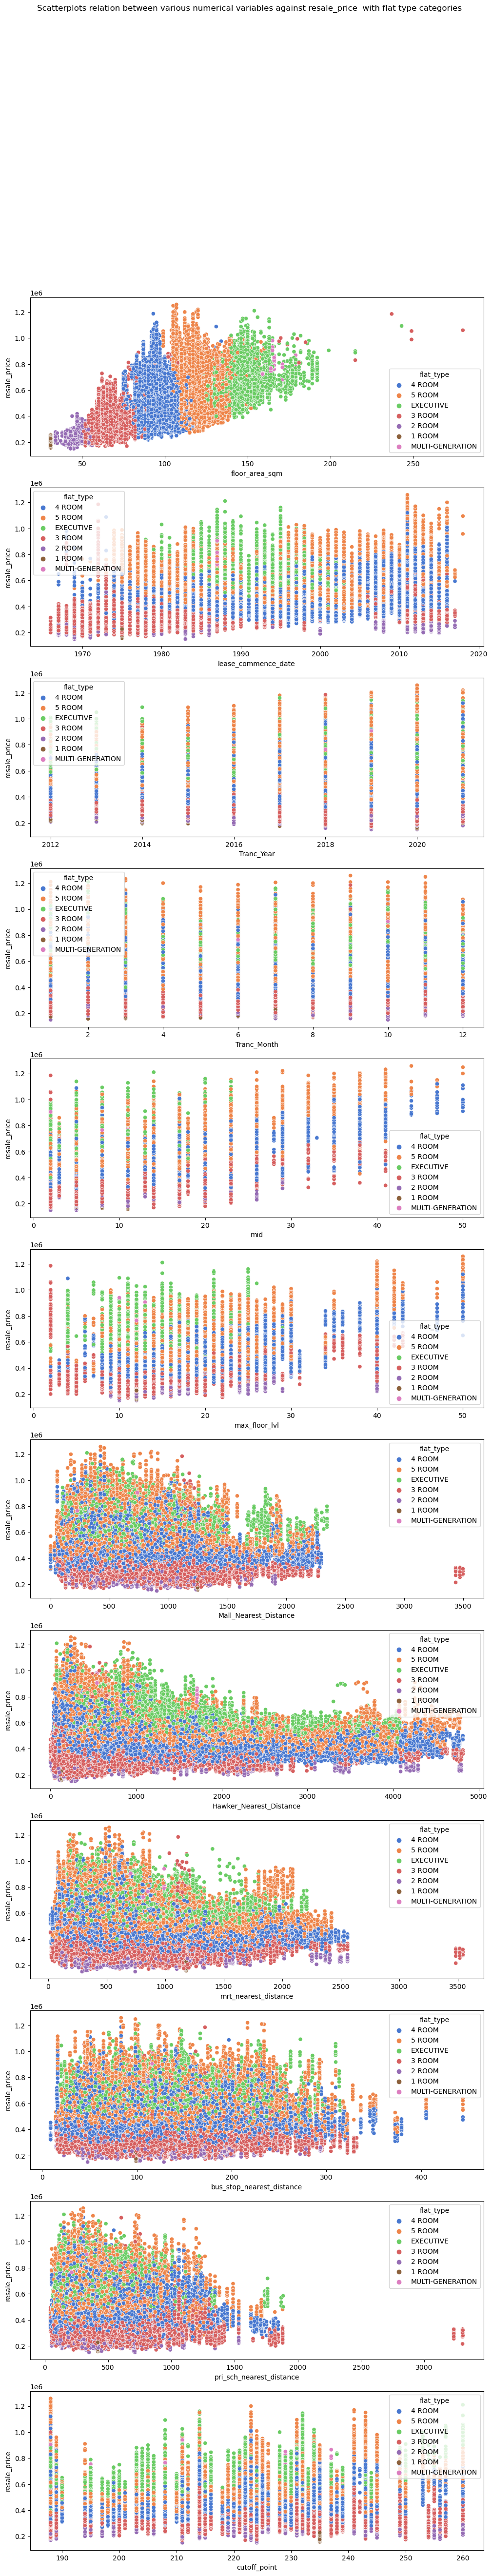

In [131]:
# Plot and interpret scatter plots to view relationships between features
fig, axes = plt.subplots(12, 1, sharex = False, sharey = False, figsize = (12, 60))
fig.suptitle('Scatterplots relation between various numerical variables against resale_price  with flat type categories')

#1
ax1 = sns.scatterplot(x = 'floor_area_sqm', y = 'resale_price', hue = 'flat_type', data=train, ax = axes[0], palette = 'muted')
#2
ax2 = sns.scatterplot(x = 'lease_commence_date', y = 'resale_price', hue = 'flat_type', data=train, ax = axes[1], palette = 'muted')
#3
ax3 = sns.scatterplot(x = 'Tranc_Year', y = 'resale_price', hue = 'flat_type', data=train, ax = axes[2], palette = 'muted')
#4
ax4 = sns.scatterplot(x = 'Tranc_Month', y = 'resale_price', hue = 'flat_type', data=train, ax = axes[3], palette = 'muted')
#5
ax5 = sns.scatterplot(x = 'mid', y = 'resale_price', hue = 'flat_type', data=train, ax = axes[4], palette = 'muted')
#6
ax6 = sns.scatterplot(x = 'max_floor_lvl', y = 'resale_price', hue = 'flat_type', data=train, ax = axes[5], palette = 'muted')
#7
ax7 = sns.scatterplot(x = 'Mall_Nearest_Distance', y = 'resale_price', hue = 'flat_type', data=train, ax = axes[6], palette = 'muted')
#8
ax8 = sns.scatterplot(x = 'Hawker_Nearest_Distance', y = 'resale_price', hue = 'flat_type', data=train, ax = axes[7], palette = 'muted')
#9
ax9 = sns.scatterplot(x = 'mrt_nearest_distance', y = 'resale_price', hue = 'flat_type', data=train, ax = axes[8], palette = 'muted')
#10
ax10 = sns.scatterplot(x = 'bus_stop_nearest_distance', y = 'resale_price', hue = 'flat_type', data=train, ax = axes[9], palette = 'muted')
#11
ax11 = sns.scatterplot(x = 'pri_sch_nearest_distance', y = 'resale_price', hue = 'flat_type', data=train, ax = axes[10], palette = 'muted')
#12
ax12 = sns.scatterplot(x = 'cutoff_point', y = 'resale_price', hue = 'flat_type', data=train, ax = axes[11], palette = 'muted')

Plotting a scatter plots of the various x variables features against the y feature resale_price, it is becomes apparent there are some form of linear relationship for house size feature ('floor_area_sqm'), house lease feature(lease_commence_date) and house storey features ('mid', 'max_floor_lvl'). 

For the scatterplot of floor_area_sqm, the data seems to be more than just linear, possibly exponential or some other form might be more suitable so some feature engeneering may have to be applied on it later on.

For the lease_commence_date, while there is some relationship between lease and price, it is possible since the flats are of quite a range of age and the transaction years and spread across a decade, the relation may have been diluted by the spread. Therefore, it would be prudent to reduce the impact by having the feature as the remaining lease during the year of transaction.

For the house storey features, it is quite apprent that they share a similar relation but and it would seem that perhaps the features may be related. A possible way would be to combine both as a ratio of the height to the block to see what sort of impact there is.

Futher plots using flat_type categories to segmentise the data did not show elucidate a very clear relation on flat_type on x variables and the resale_price. However, there is a very clear relation between flat_type and floor_area_sqm on resale_price. Prices follow 
floo_ are 
which folls  
f_at t. This is indication that there is collinearity in both features.ype

In [42]:
print(np.corrcoef(train['cutoff_point'], train['resale_price'])[0, 1])
print(np.corrcoef(train['Tranc_Year'], train['resale_price'])[0, 1])
print(np.corrcoef(train['Tranc_Month'], train['resale_price'])[0, 1])

0.0361024237523829
-0.02466610542242463
-0.005679681218629407


For the rest of the features, there seems to be atleast a clustering of the data towards one end of the axis except for transaction time ('Tranc_Year', 'Tranc_Month') and 'cutoff_point' of the secondary school which has a large spread of data through both axis and R2 of less than 0.05 absolute. Since there does not seems to have much relation, I would drop these features later on except for Tranc_Year which as mentioned earlier, would be needed to engineer a feature as the remaining lease during the year of transaction.

#### categorical features
plot of some features and sorted normalised value counts.

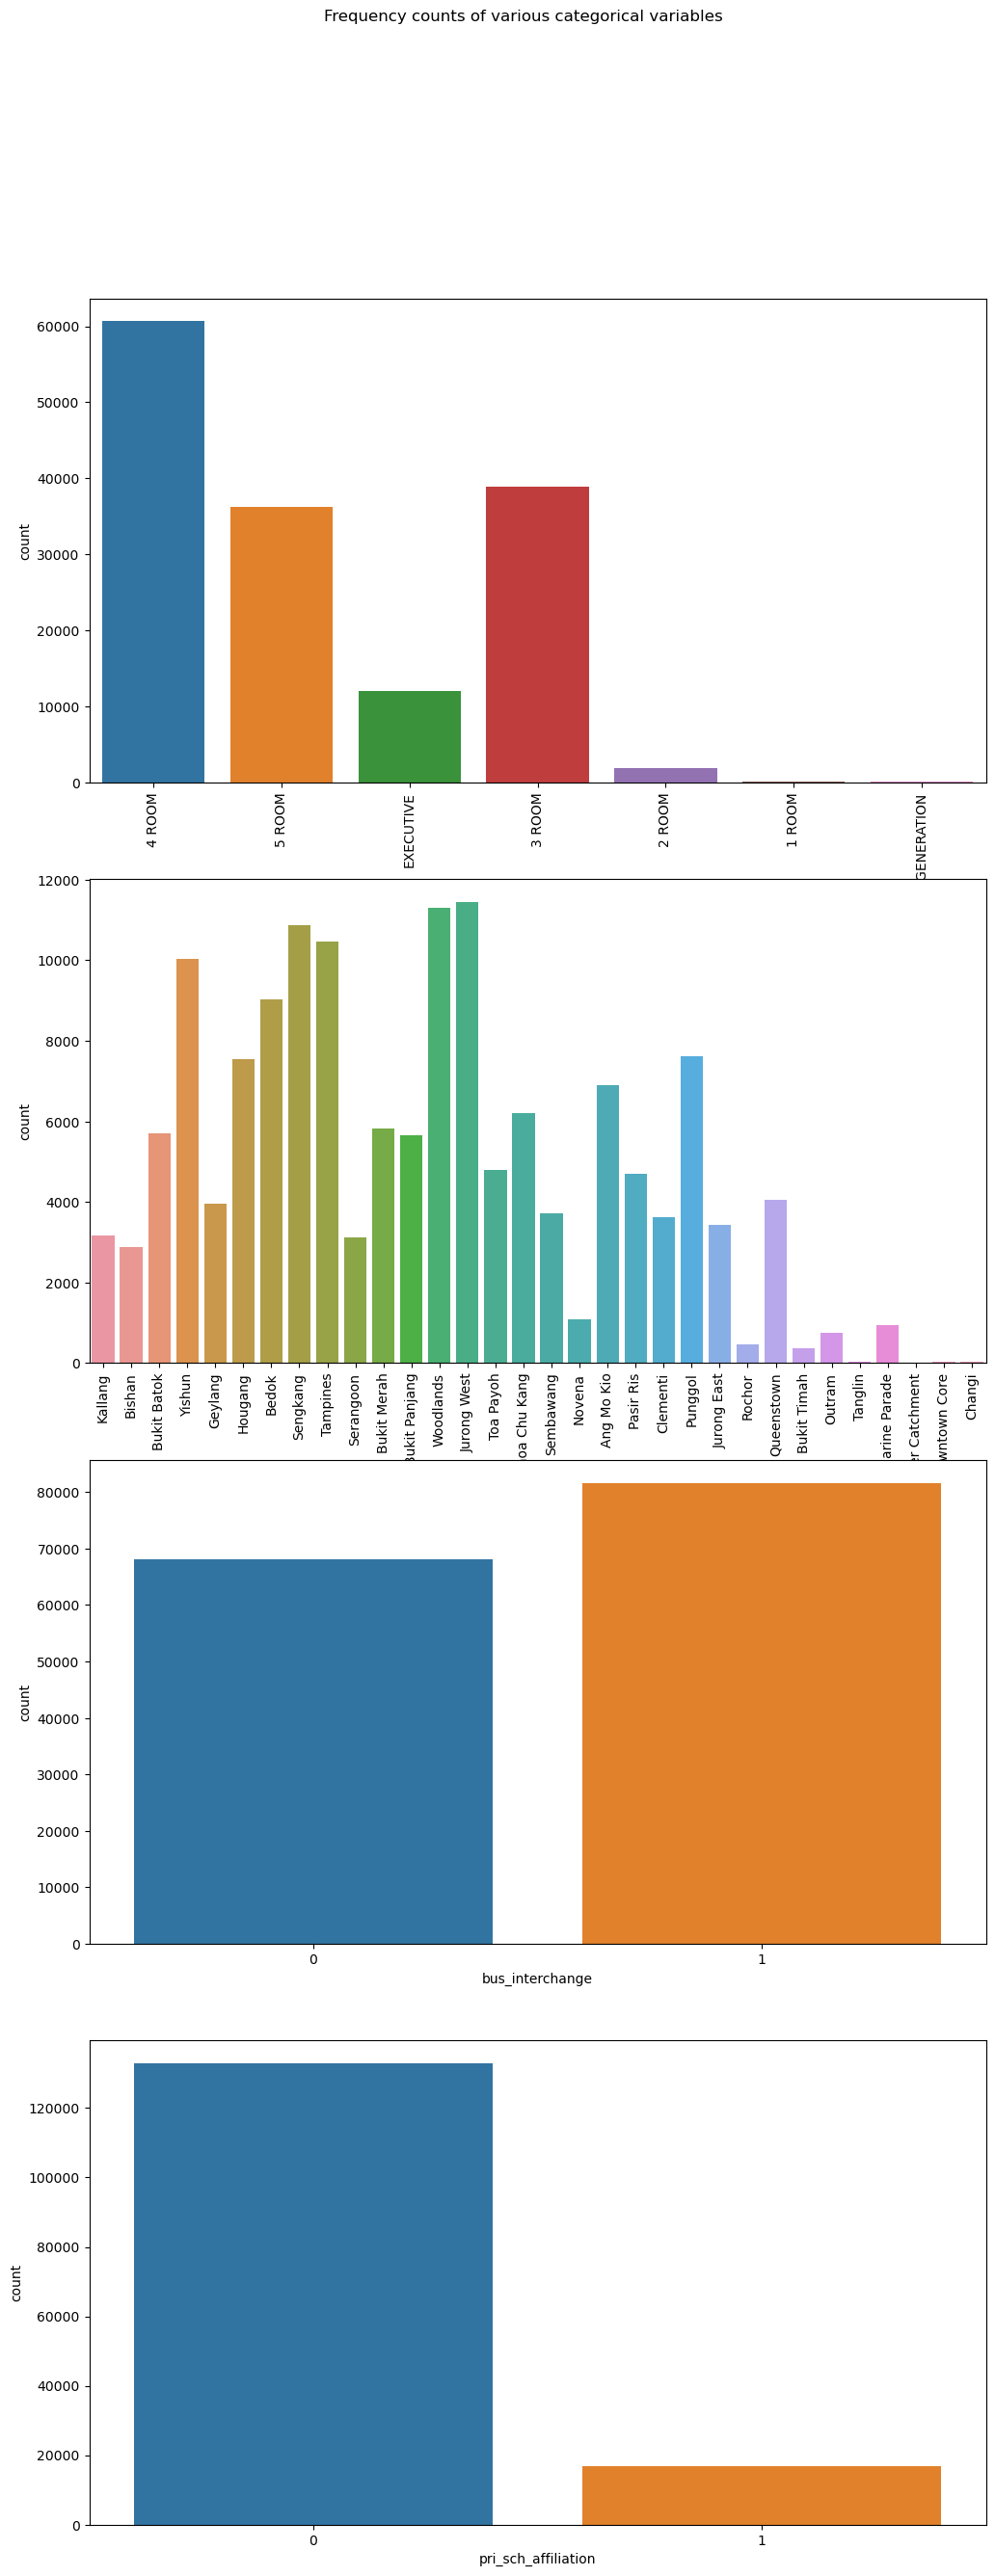

In [213]:
# Plot and interpret scatter plots to view relationships between features
fig, axes = plt.subplots(4, 1, sharex = False, sharey = False, figsize = (12, 30))
fig.suptitle('Frequency counts of various categorical variables')

ax1 = sns.countplot(data = train, x = 'flat_type', ax = axes[0] )
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)

ax2 = sns.countplot(data = train, x = 'planning_area', ax = axes[1] )
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90)

ax3 = sns.countplot(data = train, x = 'bus_interchange', ax = axes[2] )

ax4 = sns.countplot(data = train, x = 'pri_sch_affiliation', ax = axes[3] )

From the countplots above, primary school having affiliation doesnt seems to have high counts while bus interchanges seems quite even.
Unfortunately, those features with more values are difficult to decipher any meaning form the plots as there is simply too many to compare from. It would be better to use normalised value counts for comparison.

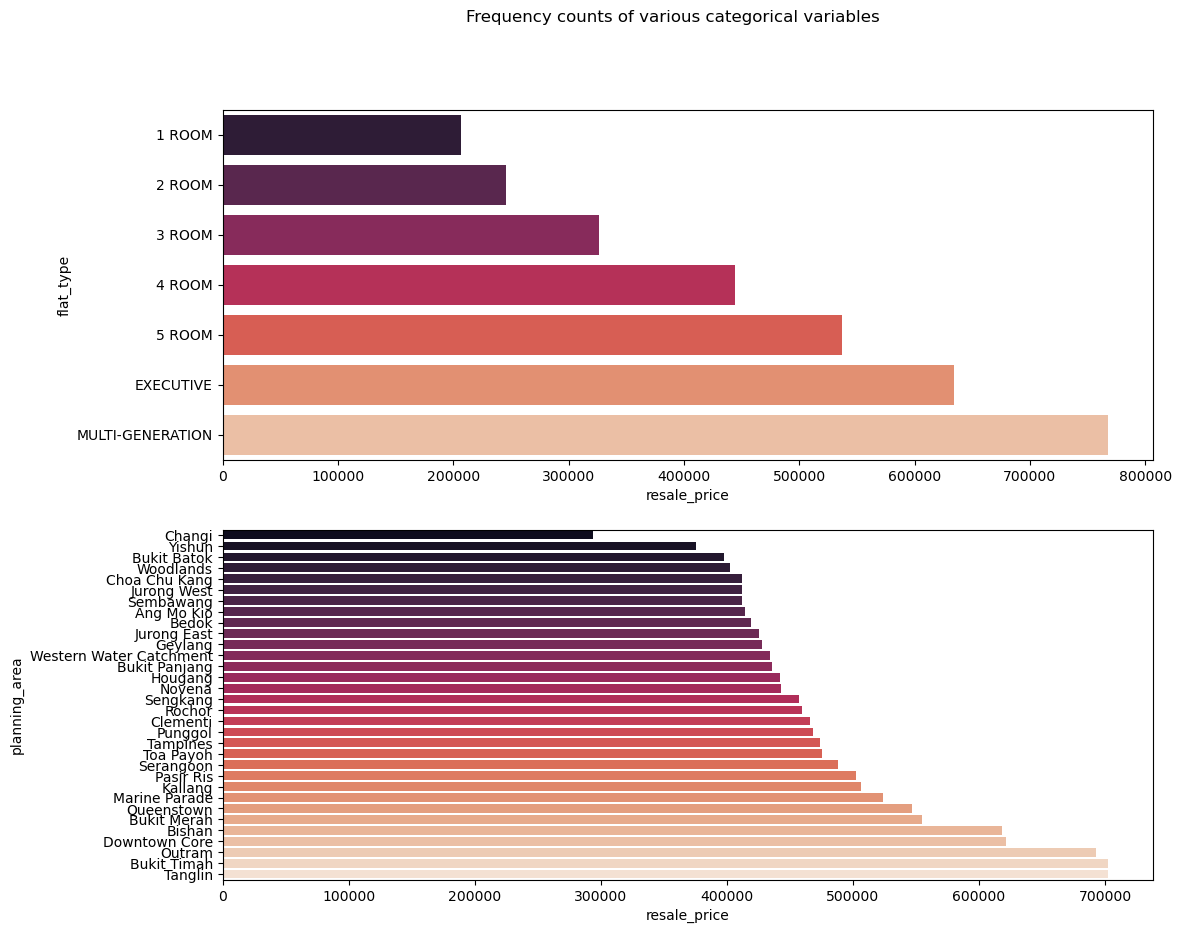

In [279]:
# Plot and interpret scatter plots to view relationships between features
fig, axes = plt.subplots(2, 1, sharex = False, sharey = False, figsize = (12, 10))
fig.suptitle('Frequency counts of various categorical variables')

flat_order = train.groupby('flat_type')['resale_price'].mean().sort_values().index.to_list()
ax1 = sns.barplot(data = train, y = 'flat_type', x ='resale_price', orient = 'h', errorbar = None, order = flat_order, ax = axes[0], palette = 'rocket')
#ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)

area_order = train.groupby('planning_area')['resale_price'].mean().sort_values().index.to_list()
ax2 = sns.barplot(data = train, y = 'planning_area', x ='resale_price', orient = 'h', errorbar = None, order = area_order, ax = axes[1], palette = 'rocket')
#ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90);

From the above barplots, there is a very clear general trend which is that the larger the flats, the higher the price which is expected since buyers are gnerally paying for space.
Another clear trend that highlights the importance of location in modeling is the fact that the more expensive areas are in the central areas  of the island (e.g. Tanglin, Bukit Timah, Outram) while the cheapest are at the fringe of the island (e.g. Changi, Yishun, Bukit Batok, Woodlands).
While the data of each feature is ploted in silo, it is clear that size of the flat and the location of the flat impacts the price greatly, with the difference between the most expensive and the least expensive more than double.

In [43]:
for i, col_name in enumerate(cat_feat):
    print(str(cat_feat[i]))
    print(train[cat_feat[i]].value_counts(normalize = True))
    print('____________________________________________')

flat_type
4 ROOM              0.405057
3 ROOM              0.259534
5 ROOM              0.241865
EXECUTIVE           0.080016
2 ROOM              0.012606
1 ROOM              0.000548
MULTI-GENERATION    0.000374
Name: flat_type, dtype: float64
____________________________________________
street_name
YISHUN RING RD        0.016373
BEDOK RESERVOIR RD    0.012572
ANG MO KIO AVE 10     0.011270
ANG MO KIO AVE 3      0.010281
PUNGGOL FIELD         0.009319
                        ...   
KRETA AYER RD         0.000047
SENG POH RD           0.000040
BT MERAH LANE 1       0.000027
SEMBAWANG WAY         0.000013
MARINE PARADE CTRL    0.000007
Name: street_name, Length: 547, dtype: float64
____________________________________________
flat_model
Model A                   0.305728
Improved                  0.256261
New Generation            0.156084
Premium Apartment         0.099449
Simplified                0.048352
Apartment                 0.040556
Standard                  0.032152
Maisonett

From the above normalised value counts, it seems that the percentage of flats being sold for the last 6 are less than 0.5% each so it might be a good idea to lump them together as a seperate categories in order to have more data point for modeling later on.

The ratio of the interchanges features are quite different which may seem peculiar but it is due to the fact that there are not as many mrt interchanges in the suburban areas since most mrt interchanges are location in the central core area of singapore where there are less houses. In a way this points to a possible relationship to the housing data that may help in the modeling later on.

For the school features,  it is suprising to not see famous schools at the top of the list and instead see some of them in the bottom instead for both primary and secondary school. This is not expected since it was assumed that famous schools might prove to be a advantageous reason that increases housing price. Coupled with the low proportions (<5%) for each school, it may be better to drop these school features to reduce the likelihood of overfitting later on especially since there is a large number of schools. Another factor not considered is that fame of the school would need a separate quantifying method which is not exactly feasible with MOE's stand that 'every school is a good school'.

In [44]:
train.groupby('sec_sch_name')[['resale_price']].mean().sort_values(by = 'resale_price', ascending = False)

resale_price
sec_sch_name                                 
Methodist Girls' School         791317.495327
Crescent Girls' School          789146.059406
Queenstown Secondary School     740162.715793
Catholic High School            677019.444206
Outram Secondary School         666092.554799
...                                       ...
Tanglin Secondary School        339050.945312
Yishun Secondary School         338707.991150
Dunearn Secondary School        338035.115336
Ahmad Ibrahim Secondary School  329400.546845
Woodlands Secondary School      299918.959748

[134 rows x 1 columns]

In [45]:
train.groupby('flat_type')[['resale_price']].mean()

resale_price
flat_type                      
1 ROOM            207015.463415
2 ROOM            245532.248543
3 ROOM            326328.244080
4 ROOM            444247.622327
5 ROOM            536705.632928
EXECUTIVE         633855.333227
MULTI-GENERATION  767992.000000

In [46]:
train.groupby('flat_model')[['resale_price']].mean()

resale_price
flat_model                          
2-room                  2.480000e+05
Adjoined flat           6.950678e+05
Apartment               6.201456e+05
DBSS                    7.503454e+05
Improved                4.610811e+05
Improved-Maisonette     6.775731e+05
Maisonette              6.743608e+05
Model A                 4.356613e+05
Model A-Maisonette      6.978675e+05
Model A2                3.691446e+05
Multi Generation        7.679920e+05
New Generation          3.537222e+05
Premium Apartment       4.769102e+05
Premium Apartment Loft  8.783470e+05
Premium Maisonette      7.605333e+05
Simplified              3.584409e+05
Standard                4.110482e+05
Terrace                 8.183171e+05
Type S1                 9.050422e+05
Type S2                 1.019220e+06

The resale_price of the flat type indicates ties in with the layman knowledge that a bigger house costs more.

In [47]:
train.groupby('planning_area')[['resale_price']].mean().sort_values(by = 'resale_price', ascending = False)

resale_price
planning_area                         
Tanglin                  702600.000000
Bukit Timah              702142.314917
Outram                   692618.972332
Downtown Core            621383.483871
Bishan                   618458.147693
Bukit Merah              554691.475639
Queenstown               547209.605962
Marine Parade            523842.453871
Kallang                  506135.158290
Pasir Ris                502430.738530
Serangoon                487914.267863
Toa Payoh                475234.582431
Tampines                 473755.727516
Punggol                  467998.232272
Clementi                 465932.503308
Rochor                   459544.247863
Sengkang                 457448.803961
Novena                   442598.775853
Hougang                  441793.403454
Bukit Panjang            436062.674061
Western Water Catchment  434566.666667
Geylang                  428044.834219
Jurong East              425700.395637
Bedok                    419281.364753
Ang Mo Kio               414234.216013
Sembawang                412356.399914
Jurong West              412231.583815
Choa Chu Kang            411841.941043
Woodlands                402712.313270
Bukit Batok              397435.616708
Yishun                   375472.447743
Changi                   293810.526316

Not surprisingly, the top prices are for house in the central regions fo singapore while the lower few prices are for the fridnge areas of the island. This will likely play a large impact on the price modeling.

### Outliers in the data
Since the coutplots were not particularly useful, a boxplot might be more useful to help shed light on the distribution of the categories.

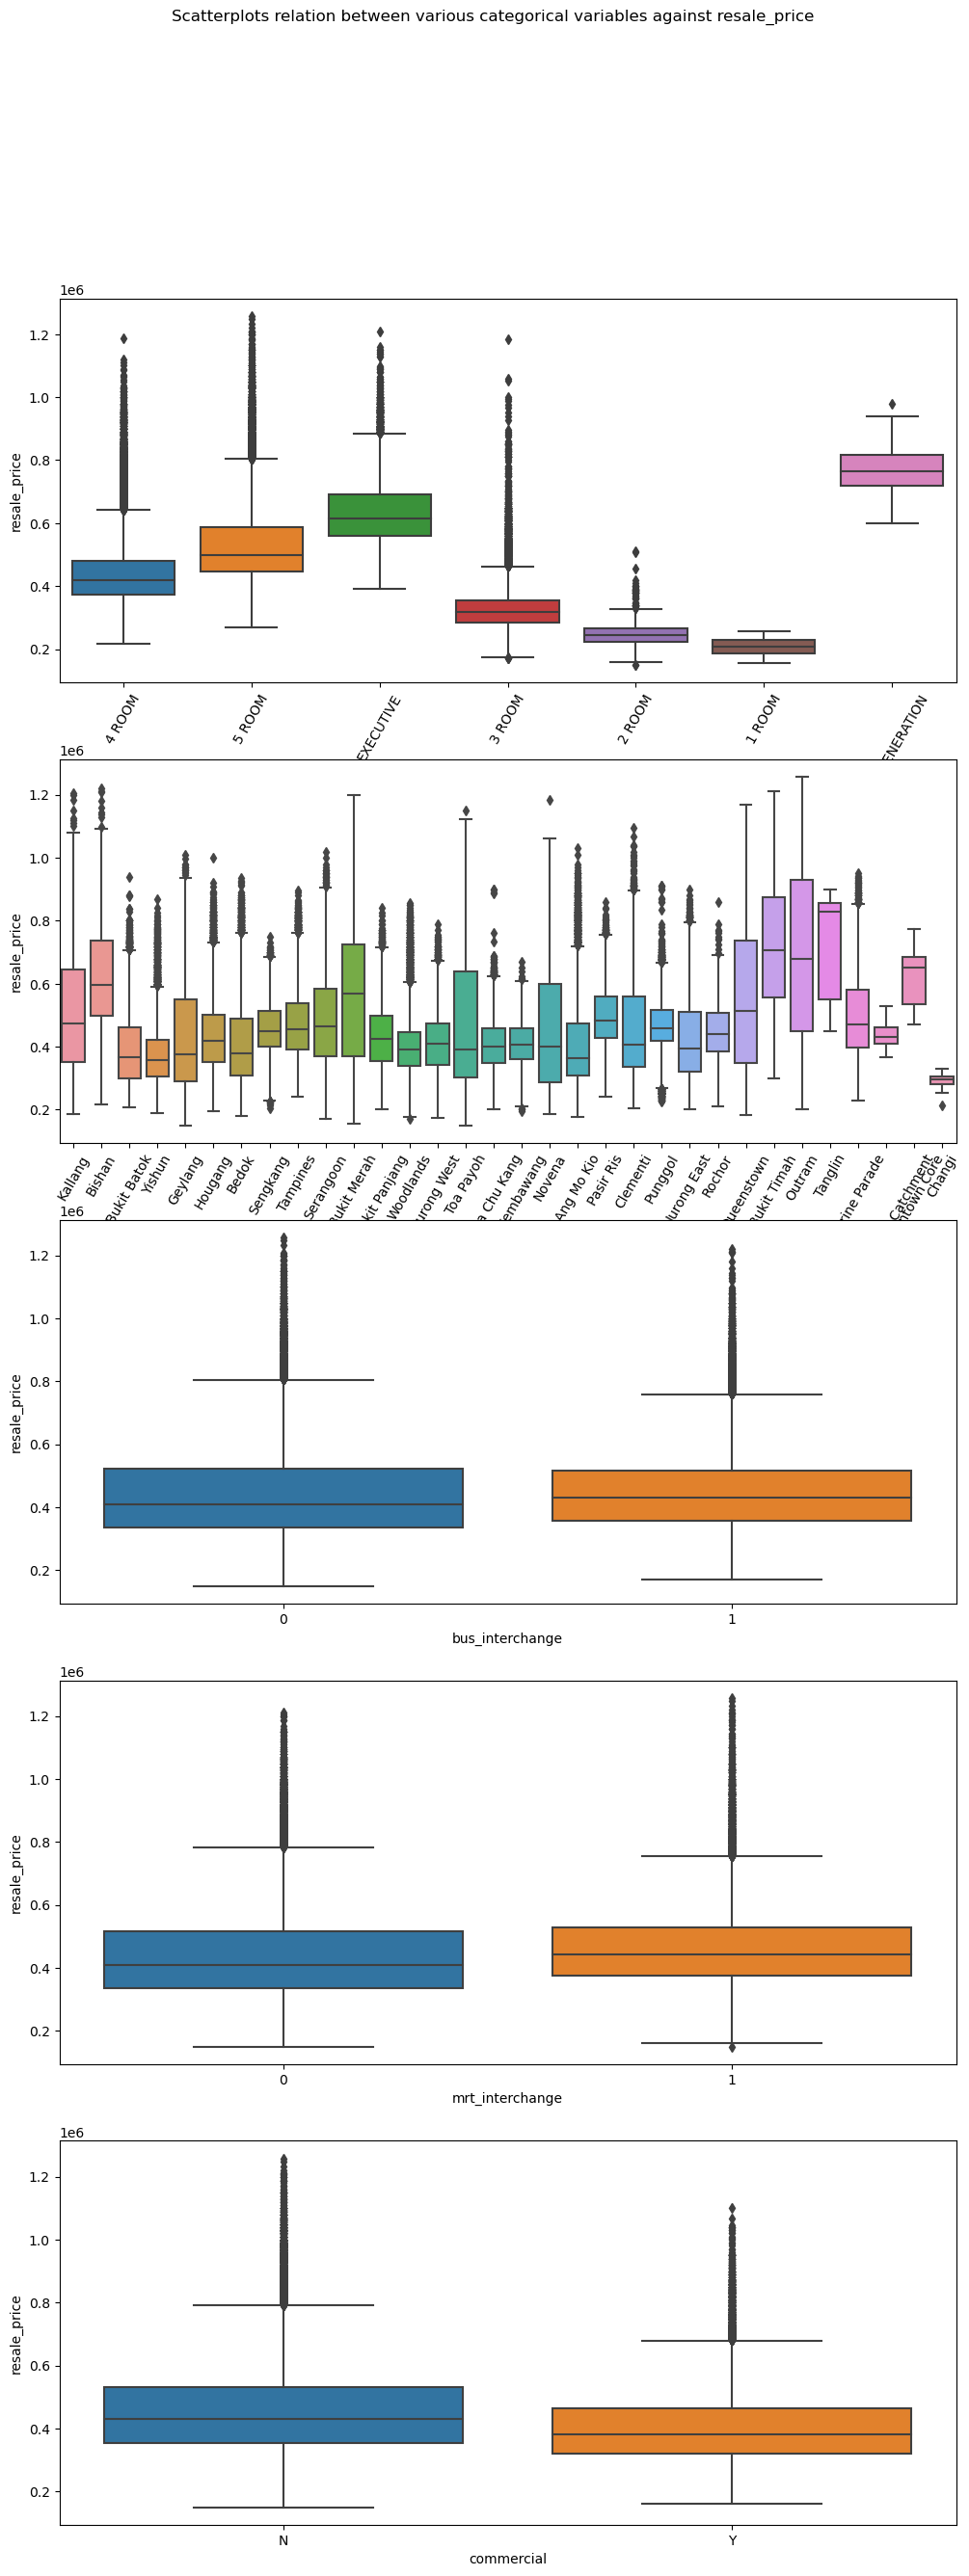

In [118]:
# Plot and interpret box plots to view dsitribution of features
fig, axes = plt.subplots(5, 1, sharex = False, sharey = False, figsize = (12, 30))
fig.suptitle('Scatterplots relation between various categorical variables against resale_price')

ax1 = sns.boxplot(data = train, x = 'flat_type', y = 'resale_price', ax = axes[0] )
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=60)
ax2 = sns.boxplot(data = train, x = 'planning_area', y = 'resale_price', ax = axes[1] )
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=60)
ax3 = sns.boxplot(data = train, x = 'bus_interchange', y = 'resale_price', ax = axes[2] )
ax4 = sns.boxplot(data = train, x = 'mrt_interchange', y = 'resale_price', ax = axes[3] )
ax5 = sns.boxplot(data = train, x = 'commercial', y = 'resale_price', ax = axes[4] )

One thing becomes very apparent with the box plots and that is the outliers which are 1.5 times the IQR, are all usually on the high side of the resale values and it is prevalent in practically all the features. Therefore, it can be intuited that there is some other factor pushing the high resale values past the norm.
Additonally, there is simply too many outlier to effectively drop the data point withouth affecting the data when modelling and it may even be likely that the outliers may represent a a shift in the resale prices hence a removal would not be a good idea currently. 

### Final export
With the EDA, it is clear that there is a multitude of factors affecting the resale prices. Given the intial reduction of features, it would be beeter to begin modelling with the current list and reduce features as required.

In [49]:
#check
train.columns

Index(['flat_type', 'street_name', 'floor_area_sqm', 'flat_model',
       'lease_commence_date', 'resale_price', 'Tranc_Year', 'Tranc_Month',
       'mid', 'max_floor_lvl', 'commercial', 'market_hawker',
       'multistorey_carpark', 'precinct_pavilion', 'total_dwelling_units',
       '1room_sold', '2room_sold', '3room_sold', '4room_sold', '5room_sold',
       'exec_sold', 'multigen_sold', 'studio_apartment_sold', '1room_rental',
       '2room_rental', '3room_rental', 'other_room_rental', 'planning_area',
       'Mall_Nearest_Distance', 'Mall_Within_500m', 'Mall_Within_1km',
       'Mall_Within_2km', 'Hawker_Nearest_Distance', 'Hawker_Within_500m',
       'Hawker_Within_1km', 'Hawker_Within_2km', 'mrt_nearest_distance',
       'bus_interchange', 'mrt_interchange', 'bus_stop_nearest_distance',
       'pri_sch_nearest_distance', 'pri_sch_name', 'pri_sch_affiliation',
       'sec_sch_name', 'cutoff_point'],
      dtype='object')

In [50]:
#data export to already created output folder
train.to_csv('../../data/output/cleaner_train.csv', index = False)

## Evaluation

In this notebook, the scope of the features are quite large but there are numerous duplicates or related features. With the EDA initlally focued on trimming down the data, this allowed the remaining data to be more mangeable for further analysis. While there are some relation with the resale_price for the floor area features ('floor_area_sqm'), house lease feature(lease_commence_date) and house storey features ('mid', 'max_floor_lvl'), as well as location ('planning_area') it is by no means a definitive and hence the modelling approach will have to be from an expanded form and slowly refined. Fortunately, the data on hand is more than sufficient for it.